1- Creacion de libreta de Google Colab e importar librerias

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

Mounted at /content/gdrive


2- Creacion de dataframe Happiness

In [3]:
happiness = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Happiness_report.csv")
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


3- Obtener dataframe de Mexico

In [4]:
mexico = happiness.loc[happiness["Country or region"] == "Mexico"]
mexico.set_index("Country or region", inplace= True)
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4- Histograma del Puntaje

Text(22    6.595
Name: Score, dtype: float64, 5, 'Mexico')

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:566: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))


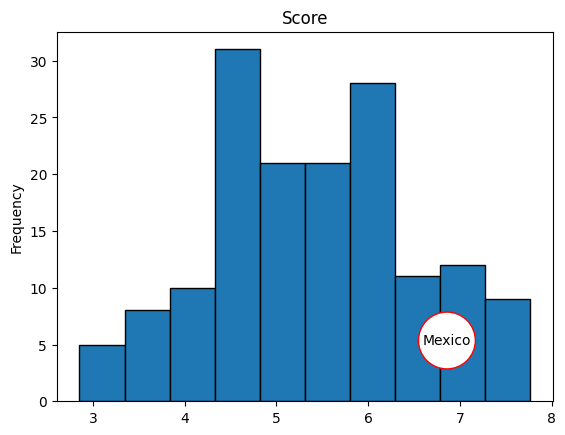

In [53]:
happiness["Score"].plot.hist(edgecolor = "black", title = "Score")
mex_score = happiness.loc[happiness["Country or region"] == "Mexico", "Score"]
plt.text(mex_score, 5, "Mexico", bbox=dict(facecolor='white', edgecolor='red', boxstyle='circle'))

5- Boxplot Esperanza de vida

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))


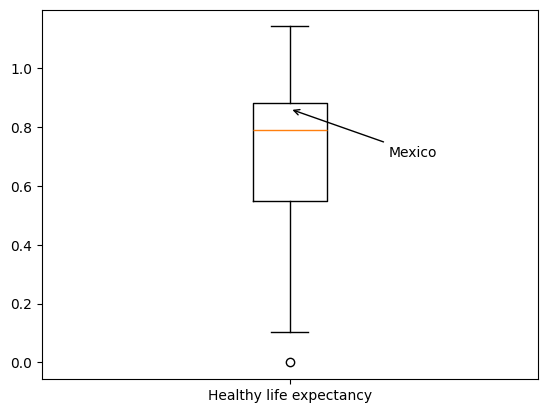

In [52]:
plt.boxplot(happiness["Healthy life expectancy"], labels = ["Healthy life expectancy"])

value = mexico["Healthy life expectancy"]
plt.annotate("Mexico",xy=(1,value),xytext=(1.2,0.7),arrowprops=dict(arrowstyle='->'), xycoords= "data")
plt.show()

6- Grafica de Factores que contribuyen a la felicidad en Mexico

Text(0.5, 1.0, 'Mexico Happiness Contributing Factors')

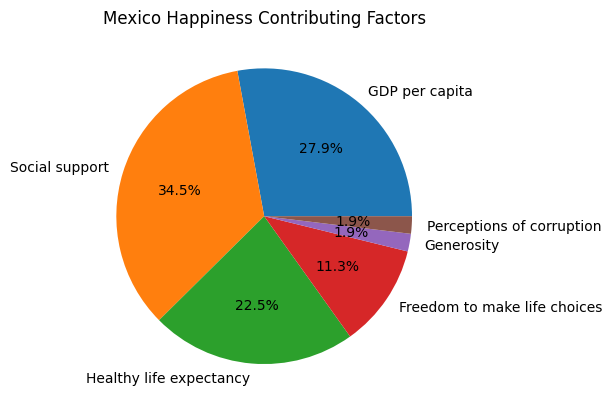

In [7]:
mexico[["GDP per capita",	"Social support",	"Healthy life expectancy",	"Freedom to make life choices",	"Generosity", "Perceptions of corruption"]].T.plot.pie(y="Mexico", legend= False, ylabel= "", autopct = "%1.1f%%")
plt.title("Mexico Happiness Contributing Factors")

7- Grafica de 5 Paises

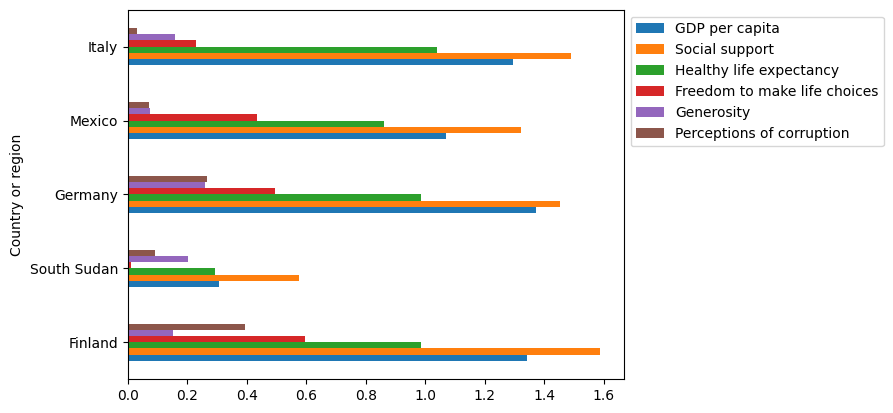

In [122]:
filtered_df = happiness.loc[(happiness["Score"].isin([happiness["Score"].max(), happiness["Score"].min()]))]
add_df = happiness.loc[happiness["Country or region"].isin(["Mexico", "Germany", "Italy"])]
filtered_df = pd.concat([filtered_df, add_df])
filtered_df.set_index("Country or region", inplace= True)
filtered_df = filtered_df[["GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]]
filtered_df.plot(kind= "barh")
plt.legend(bbox_to_anchor = (1, 1))


8- Matriz de subgraficas con scatter plots

Text(0, 7.5, 'Corr = 0.39')

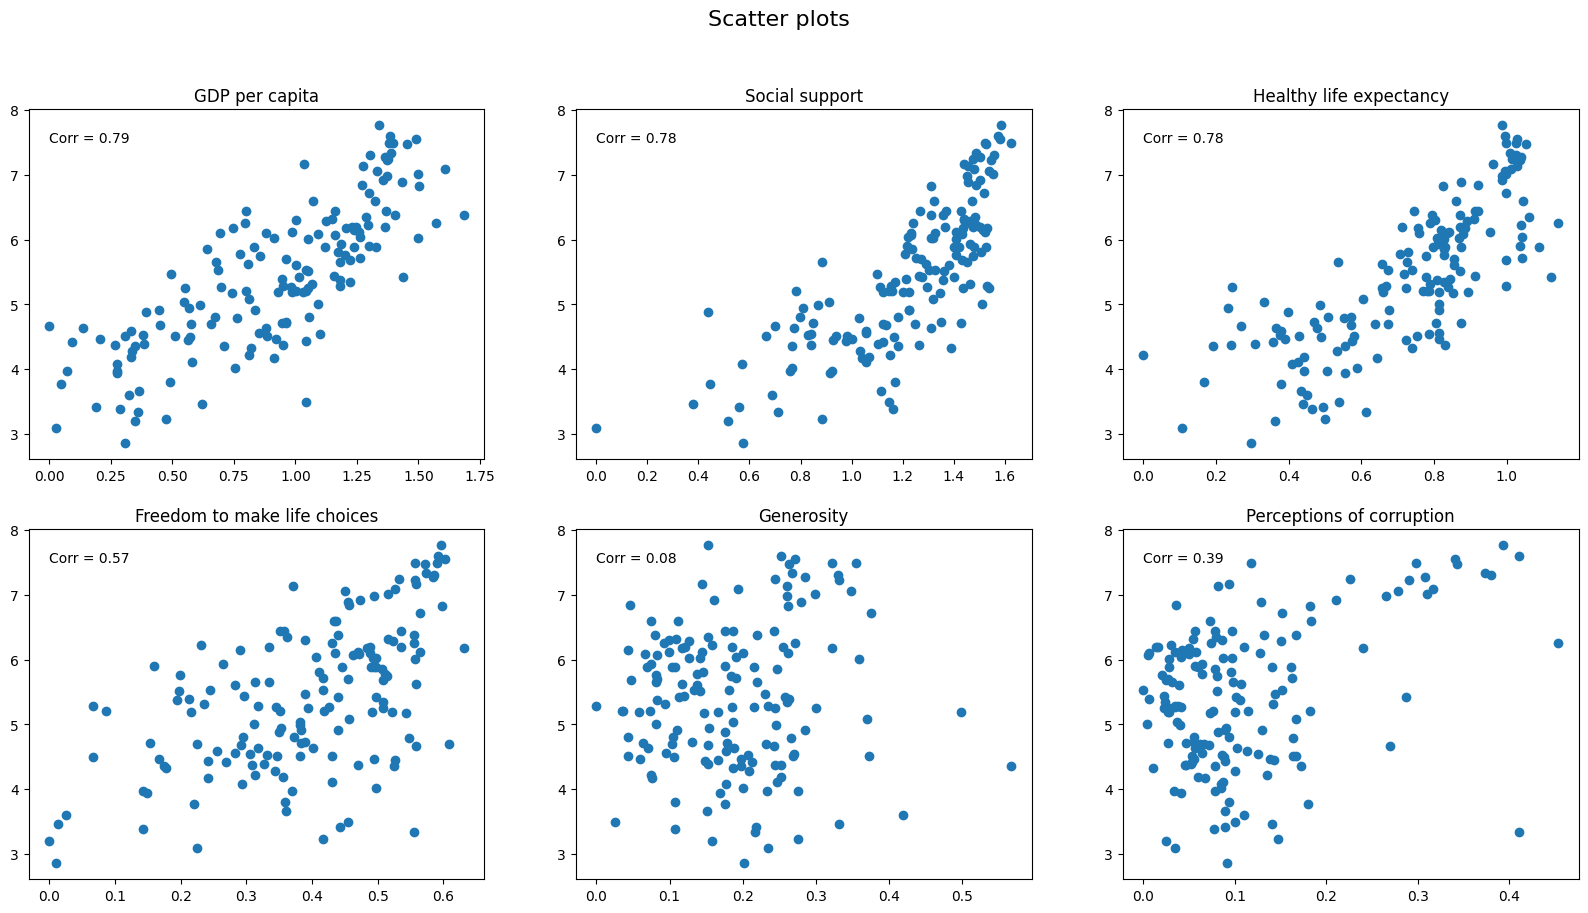

In [9]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Scatter plots', fontsize=16)

ax1 = fig.add_subplot(231)
ax1.set_title("GDP per capita")
plt.scatter("GDP per capita","Score", data= happiness)
plt.text( 0,7.5,"Corr = " + str(happiness["GDP per capita"].corr(happiness["Score"]).round(2)))

ax2 = fig.add_subplot(232)
ax2.set_title("Social support")
plt.scatter("Social support","Score", data= happiness)
plt.text( 0,7.5,"Corr = " + str(happiness["Social support"].corr(happiness["Score"]).round(2)))

ax3 = fig.add_subplot(233)
ax3.set_title("Healthy life expectancy")
plt.scatter("Healthy life expectancy","Score", data= happiness)
plt.text( 0,7.5,"Corr = " + str(happiness["Healthy life expectancy"].corr(happiness["Score"]).round(2)))

ax4 = fig.add_subplot(234)
ax4.set_title("Freedom to make life choices")
plt.scatter("Freedom to make life choices","Score", data= happiness)
plt.text( 0,7.5,"Corr = " + str(happiness["Freedom to make life choices"].corr(happiness["Score"]).round(2)))

ax5 = fig.add_subplot(235)
ax5.set_title("Generosity")
plt.scatter("Generosity","Score", data= happiness)
plt.text( 0,7.5,"Corr = " + str(happiness["Generosity"].corr(happiness["Score"]).round(2)))

ax6 = fig.add_subplot(236)
ax6.set_title("Perceptions of corruption")
plt.scatter("Perceptions of corruption","Score", data= happiness)
plt.text( 0,7.5,"Corr = " + str(happiness["Perceptions of corruption"].corr(happiness["Score"]).round(2)))


Heatmap de correlacion
Correlacion con Score, el factor que mas influye es GDP per capita

<Axes: title={'center': 'Heatmap Correlacion'}>

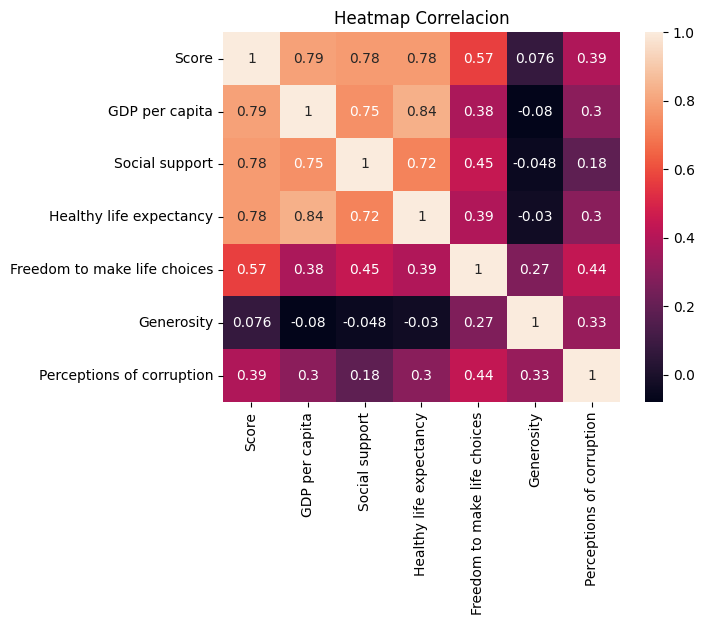

In [44]:
plt.title("Heatmap Correlacion")
sns.heatmap(happiness[["Score", "GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]].corr(), annot = True)


9- Grafica de felicidad por region combinando el dataframe metadata

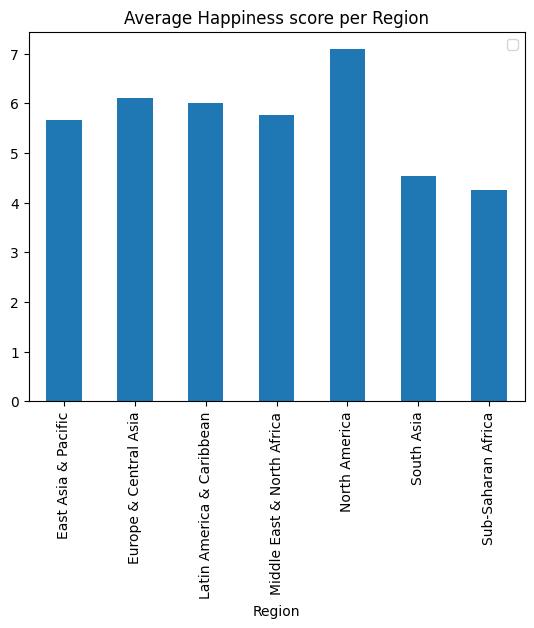

In [11]:
metadata = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Metadata.csv")
merged_df = pd.merge(happiness, metadata, left_on= "Country or region", right_on= "TableName")
merged_df[["Region", "Score"]].groupby("Region").mean().plot.bar()
plt.title("Average Happiness score per Region")
plt.legend("")